In [1]:
%pylab inline
import pandas as pd
from scipy import optimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
global g  
g=9.8

In [3]:
#Función para calcular la acción de un conjunto de puntos realizada en clase por el profesor
def S(x,t=0.,m=0,xini=0.,xend=0.):
    t=float(t)
    Dt=t/x[:-1].size
    x=np.asarray(x)
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]))*Dt).sum()

In [4]:
#Función para calcular la mínima acción en un intervalo de tiempo realizada en clase por el profesor
def xfit(n,t=0,m=0,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)

    :Parameters:

    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.

    :Returns: (x,xmax,Smin)
    
    x: ndarray
        minimizer of the action S(x)
        
    xini:
    
    xend:

    xmax: number
        Maximum height for the object

    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    t=float(t)
    if n%2==0:
        print ('x array must be odd')
        sys.exit()
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size
    return x,xmax,Smin,Dt  

In [5]:
#Definiendo condiciones
n=13
t=3.5 # s - nota:se cambia el tiempo de vuelo para cambiar así la altura máxima
m=0.2# kg

#Arreglo que minimiza la acción
y=xfit(n,t,m,ftol=1E-16)

Optimization terminated successfully.
         Current function value: -34.075998
         Iterations: 17
         Function evaluations: 2675


In [6]:
#Construyendo la ecuación de movimiento
t=np.linspace(0,3.5,n)
pol=np.polyfit(t,y[0],deg=2)
P=np.poly1d(pol)
print(P)

      2
-4.9 x + 17.15 x - 4.322e-09


La acción mínima es: -34.07599797453705 y la altura máxima es: 15.006249927551991


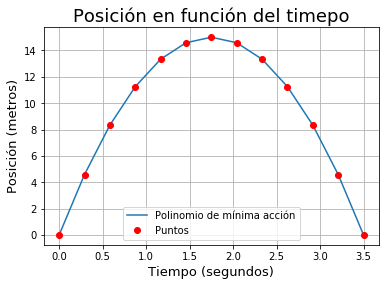

In [7]:
#Gráfica
plt.plot(t,P(t), label='Polinomio de mínima acción')
plt.plot(t,y[0],'ro', label='Puntos')
plt.title('Posición en función del timepo', size=18)
plt.xlabel('Tiempo (segundos)', size=13)
plt.ylabel('Posición (metros)', size=13)
plt.grid()
plt.legend()
print('La acción mínima es: {} y la altura máxima es: {}'.format(y[2],y[1]))